In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

In [5]:
data=pd.read_csv('/content/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
# Select numerical features for outlier detection
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Function to detect outliers using IQR
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)][feature]
    return outliers, lower_bound, upper_bound

# Detect and print outliers for each numerical feature
outlier_summary = {}
for feature in numerical_features:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data, feature)
    outlier_summary[feature] = {
        'outliers': outliers.values,
        'count': len(outliers),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
print("Outlier Summary:")
for feature, summary in outlier_summary.items():
    print(f"\n{feature}:")
    print(f"  Number of outliers: {summary['count']}")
    print(f"  Lower bound: {summary['lower_bound']:.2f}, Upper bound: {summary['upper_bound']:.2f}")
    if summary['count'] > 0:
        print(f"  Outlier values: {summary['outliers']}")

Outlier Summary:

age:
  Number of outliers: 0
  Lower bound: 28.50, Upper bound: 80.50

trestbps:
  Number of outliers: 30
  Lower bound: 90.00, Upper bound: 170.00
  Outlier values: [180 178 174 180 192 200 178 192 180 200 192 172 180 174 178 180 200 180
 178 180 178 174 180 200 172 180 178 178 172 180]

chol:
  Number of outliers: 16
  Lower bound: 115.00, Upper bound: 371.00
  Outlier values: [417 564 409 564 394 407 564 407 394 394 409 417 407 407 417 409]

thalach:
  Number of outliers: 4
  Lower bound: 81.00, Upper bound: 217.00
  Outlier values: [71 71 71 71]

oldpeak:
  Number of outliers: 7
  Lower bound: -2.70, Upper bound: 4.50
  Outlier values: [5.6 5.6 6.2 6.2 6.2 5.6 5.6]


In [11]:
# Split features and target
X = data.drop('target', axis=1)
y = data['target']

In [7]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

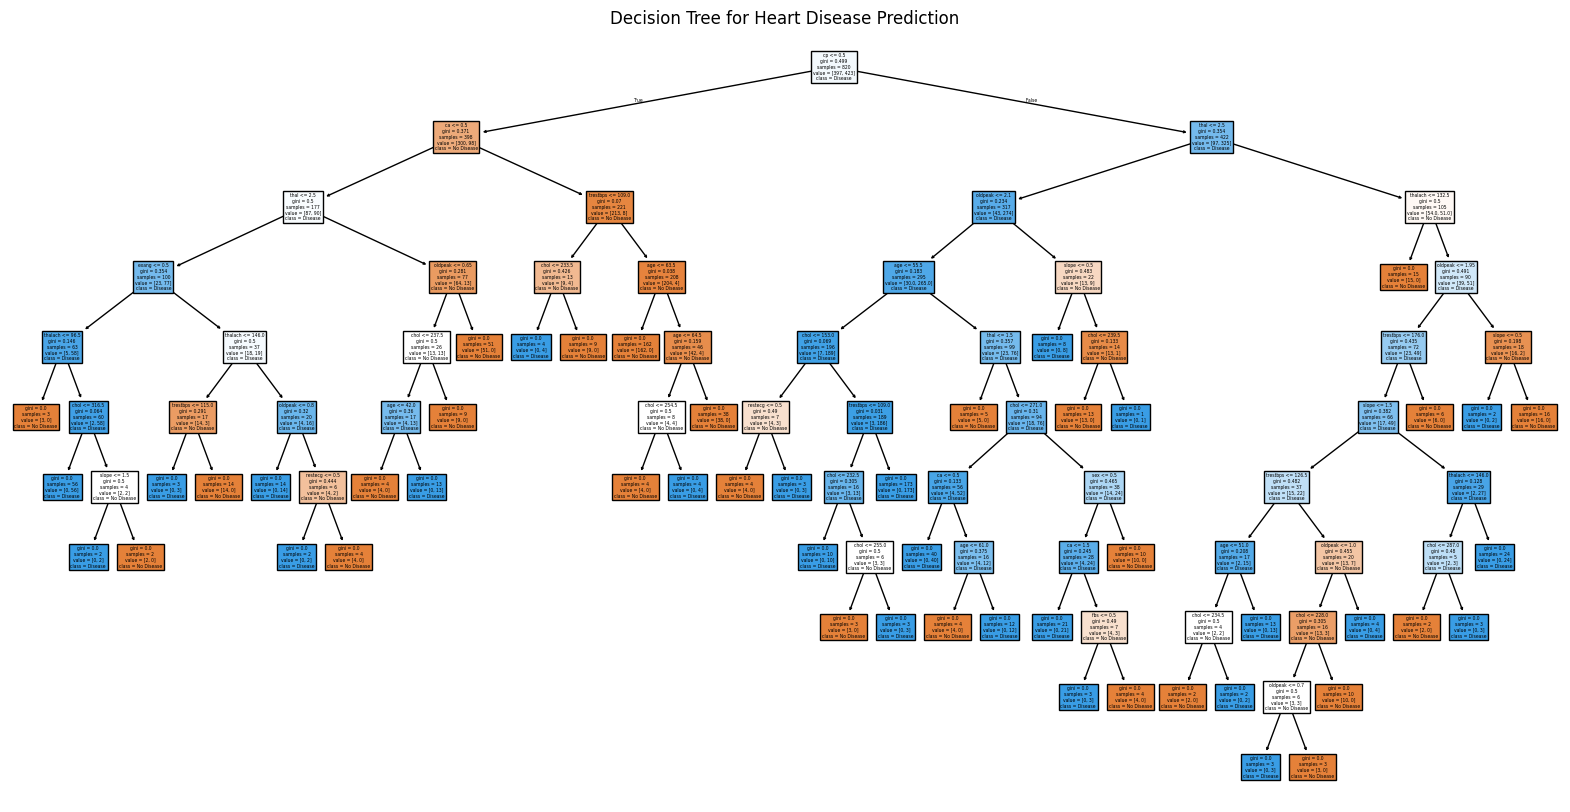

In [19]:
# Visualize the tree
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=columns[:-1], class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree for Heart Disease Prediction")
plt.show()


In [11]:
depths = range(1, 11)
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, dt.predict(X_train)))
    test_scores.append(accuracy_score(y_test, dt.predict(X_test)))


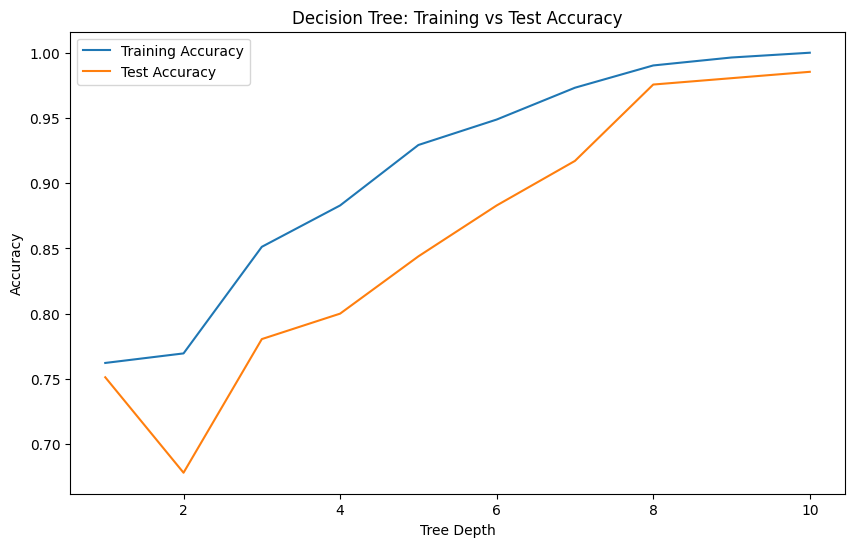

In [18]:
# Plot train vs test accuracy to show overfitting
plt.figure(figsize=(10,6))
plt.plot(depths, train_scores, label='Training Accuracy')
plt.plot(depths, test_scores, label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Training vs Test Accuracy')
plt.legend()
plt.show()


In [13]:
# 3. Train Random Forest and compare accuracy
optimal_depth = depths[np.argmax(test_scores)]
dt_optimal = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
dt_optimal.fit(X_train, y_train)
dt_accuracy = accuracy_score(y_test, dt_optimal.predict(X_test))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))


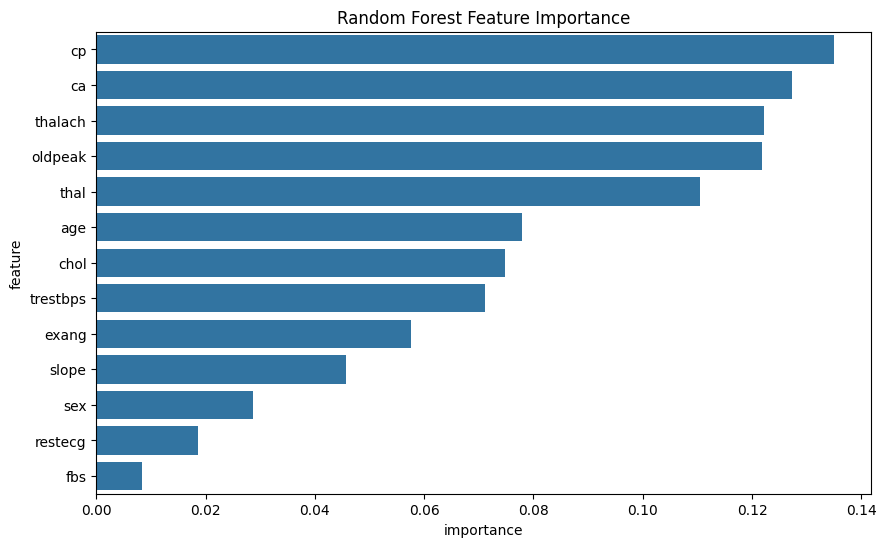

In [17]:
# 4. Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': columns[:-1],
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()

In [15]:
# 5. Cross-validation
dt_cv_scores = cross_val_score(dt_optimal, X, y, cv=5)
rf_cv_scores = cross_val_score(rf, X, y, cv=5)


In [16]:
# Print results
print(f"Decision Tree Accuracy (depth={optimal_depth}): {dt_accuracy:.3f}")
print(f"Random Forest Accuracy: {rf_accuracy:.3f}")
print(f"Decision Tree CV Mean (std): {dt_cv_scores.mean():.3f} ({dt_cv_scores.std():.3f})")
print(f"Random Forest CV Mean (std): {rf_cv_scores.mean():.3f} ({rf_cv_scores.std():.3f})")
print("\nTop 5 Most Important Features:")
print(feature_importance.head())

Decision Tree Accuracy (depth=10): 0.985
Random Forest Accuracy: 0.985
Decision Tree CV Mean (std): 1.000 (0.000)
Random Forest CV Mean (std): 0.997 (0.006)

Top 5 Most Important Features:
    feature  importance
2        cp    0.135072
11       ca    0.127327
7   thalach    0.122169
9   oldpeak    0.121905
12     thal    0.110518
